<a href="https://colab.research.google.com/github/edbertocampo/ITBA3206-PROJECT-GAIA/blob/main/Climate_Change_in_the_Philippines_through_the_Years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate Change in the Philippines through the Years

# Importing all the libraries needed in the analysis

In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv

# Uploading the datasets (.csv files)

In [68]:
annual_mean = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/tas_timeseries_annual_cru_1901-2020_PHL.csv'
annual_min = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/tasmin_timeseries_annual_cru_1901-2020_PHL.csv'
annual_max = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/tasmax_timeseries_annual_cru_1901-2020_PHL.csv'
monthly_mean = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/tas_timeseries_monthly_cru_1901-2020_PHL.csv'
monthly_min = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/tasmin_timeseries_monthly_cru_1901-2020_PHL.csv' 
monthly_max = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/tasmax_timeseries_monthly_cru_1901-2020_PHL.csv'
annual_precipitation = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/pr_timeseries_annual_cru_1901-2020_PHL.csv'
monthly_precipitation = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/pr_timeseries_monthly_cru_1901-2020_PHL.csv'
climatology_1 = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/tas_climatology_annual-monthly_cru_1901-1930_PHL.csv'
climatology_2 = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/tas_climatology_annual-monthly_cru_1931-1960_PHL.csv'
climatology_3 = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/tas_climatology_annual-monthly_cru_1961-1990_PHL.csv'
climatology_4 = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/tas_climatology_annual-monthly_cru_1991-2020_PHL.csv'
statistics = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/key-natural-hazard-statistics-for-1980-2020.csv'
observe_avg = 'https://github.com/edbertocampo/ITBA3206-PROJECT-GAIA/raw/main/datasets/observed-average-annual-mean-temperature-of-philippines-for-1901-2020.csv'

# Reading and Printing the datasets(.csv files)

In [69]:
annualmean =  pd.read_csv(annual_mean)
annualmin = pd.read_csv(annual_min)
annualmax = pd.read_csv(annual_max)
monthlymean =  pd.read_csv(monthly_mean)
monthlymin = pd.read_csv(monthly_min)
monthlymax = pd.read_csv(monthly_max)
annualprecipitation = pd.read_csv(annual_precipitation)
monthlyprecipitation = pd.read_csv(monthly_precipitation)
climatology1 = pd.read_csv(climatology_1)
climatology2 = pd.read_csv(climatology_2)
climatology3 = pd.read_csv(climatology_3)
climatology4 = pd.read_csv(climatology_4)
stats = pd.read_csv(statistics) 
ob_avg =pd.read_csv(observe_avg)

# Renaming Annual Mean Header

In [70]:
annualmean.rename(columns={'Cordillera Administrative region (CAR)' : 'CAR', 'National Capital region (NCR)' : 'NCR', 
                       'Region I (Ilocos region)' : 'Ilocos_Region', 'Region II (Cagayan Valley)' : 'Cagayan_Valley', 'Region V (Bicol region)' : 'Bicol_Region', 
                       'Region VI (Western Visayas)' : 'Western_Visayas', 'Region VII (Central Visayas)' : 'Central_Visayas', 'Region VIII (Eastern Visayas)' : 'Eastern_Visayas',
                       'Region XIII (Caraga)' :'Caraga', 'Autonomous region in Muslim Mindanao (ARMM)' : 'ARMM', 'Region IX (Zamboanga Peninsula)' : 'Zamboanga_Peninsula', 
                       'Region X (Northern Mindanao)' : 'Northern_Mindanao', 'Region XI (Davao Region)' : 'Davao_Region', 'Region XII (Soccsksargen)' : 'SOCCSKSARGEN',
                       'Region III (Central Luzon)' : 'Central_Luzon', 'Region IV-A (Calabarzon)' : 'CALABARZON', 'Region IV (Southern Tagalog)' : 'Southern_Tagalog'}, inplace=True)
annualmean

,Year,Philippines,CAR,NCR,Ilocos_Region,Cagayan_Valley,Bicol_Region,Western_Visayas,Central_Visayas,Eastern_Visayas,Caraga,ARMM,Zamboanga_Peninsula,Northern_Mindanao,Davao_Region,SOCCSKSARGEN,Central_Luzon,CALABARZON,Southern_Tagalog
0,1901,25.44,22.63,26.25,24.46,24.26,26.87,26.89,26.98,26.87,25.97,25.41,26.71,24.53,24.82,25.03,25.42,26.38,26.23
1,1902,25.43,22.85,26.30,24.67,24.46,26.77,26.71,26.83,26.71,25.90,25.34,26.62,24.44,24.78,24.99,25.54,26.39,26.09
2,1903,25.10,22.58,26.00,24.35,24.19,26.36,26.27,26.46,26.27,25.59,25.05,26.31,24.13,24.50,24.69,25.23,26.09,25.73
3,1904,24.49,22.10,25.40,23.85,23.70,25.67,25.54,25.75,25.56,24.97,24.43,25.63,23.47,23.95,24.14,24.65,25.45,25.04
4,1905,24.85,22.49,25.80,24.25,24.10,26.06,25.91,26.11,25.94,25.29,24.76,25.96,23.82,24.26,24.45,25.07,25.84,25.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2016,26.36,24.02,27.24,25.74,25.64,27.52,27.42,27.61,27.44,26.80,26.34,27.54,25.37,25.74,26.01,26.52,27.28,26.79
116,2017,25.91,23.72,26.83,25.46,25.31,27.06,26.94,27.10,26.95,26.30,25.81,27.03,24.83,25.24,25.46,26.15,26.85,26.38
117,2018,26.11,23.80,26.95,25.57,25.38,27.25,27.14,27.35,27.20,26.59,26.07,27.27,25.13,25.53,25.77,26.28,27.00,26.50
118,2019,26.18,24.01,27.01,25.76,25.57,27.29,27.20,27.40,27.25,26.59,26.12,27.32,25.16,25.52,25.79,26.37,27.04,26.55


# Renaming Annual Min Header

In [71]:
annualmin.rename(columns={'Cordillera Administrative region (CAR)' : 'CAR', 'National Capital region (NCR)' : 'NCR', 
                       'Region I (Ilocos region)' : 'Ilocos_Region', 'Region II (Cagayan Valley)' : 'Cagayan_Valley', 'Region V (Bicol region)' : 'Bicol_Region', 
                       'Region VI (Western Visayas)' : 'Western_Visayas', 'Region VII (Central Visayas)' : 'Central_Visayas', 'Region VIII (Eastern Visayas)' : 'Eastern_Visayas',
                       'Region XIII (Caraga)' :'Caraga', 'Autonomous region in Muslim Mindanao (ARMM)' : 'ARMM', 'Region IX (Zamboanga Peninsula)' : 'Zamboanga_Peninsula', 
                       'Region X (Northern Mindanao)' : 'Northern_Mindanao', 'Region XI (Davao Region)' : 'Davao_Region', 'Region XII (Soccsksargen)' : 'SOCCSKSARGEN',
                       'Region III (Central Luzon)' : 'Central_Luzon', 'Region IV-A (Calabarzon)' : 'CALABARZON', 'Region IV (Southern Tagalog)' : 'Southern_Tagalog'}, inplace=True)
annualmin

,Year,Philippines,CAR,NCR,Ilocos_Region,Cagayan_Valley,Bicol_Region,Western_Visayas,Central_Visayas,Eastern_Visayas,Caraga,ARMM,Zamboanga_Peninsula,Northern_Mindanao,Davao_Region,SOCCSKSARGEN,Central_Luzon,CALABARZON,Southern_Tagalog
0,1901,21.04,18.10,22.01,20.06,19.61,23.09,23.33,23.13,23.03,21.33,20.62,22.26,19.56,19.96,20.04,20.87,22.42,22.24
1,1902,21.03,18.32,22.06,20.27,19.81,23.00,23.15,22.97,22.87,21.26,20.56,22.17,19.48,19.92,20.00,21.00,22.42,22.10
2,1903,20.88,17.96,21.78,19.88,19.48,22.70,22.92,22.86,22.63,21.31,20.66,22.28,19.58,20.04,20.10,20.66,22.15,21.81
3,1904,20.27,17.59,21.23,19.48,19.07,22.03,22.18,22.12,21.88,20.59,19.99,21.53,18.81,19.41,19.50,20.15,21.56,21.15
4,1905,20.42,17.56,21.31,19.46,19.09,22.20,22.44,22.40,22.19,20.84,20.19,21.71,19.07,19.61,19.67,20.22,21.66,21.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2016,22.31,20.28,23.70,22.11,21.75,24.28,24.17,23.93,23.95,22.19,21.52,23.11,20.41,20.79,20.91,22.72,23.97,23.13
116,2017,21.95,19.93,23.24,21.78,21.37,23.79,23.74,23.56,23.50,21.91,21.26,22.82,20.11,20.62,20.71,22.28,23.49,22.70
117,2018,22.00,19.90,23.30,21.79,21.34,23.89,23.81,23.63,23.64,22.03,21.27,22.81,20.20,20.69,20.77,22.34,23.57,22.73
118,2019,22.12,20.28,23.40,22.13,21.67,23.90,23.83,23.66,23.61,22.04,21.38,22.90,20.26,20.73,20.86,22.53,23.62,22.80


# Renaming Max Header

In [72]:
annualmax.rename(columns={'Cordillera Administrative region (CAR)' : 'CAR', 'National Capital region (NCR)' : 'NCR', 
                       'Region I (Ilocos region)' : 'Ilocos_Region', 'Region II (Cagayan Valley)' : 'Cagayan_Valley', 'Region V (Bicol region)' : 'Bicol_Region', 
                       'Region VI (Western Visayas)' : 'Western_Visayas', 'Region VII (Central Visayas)' : 'Central_Visayas', 'Region VIII (Eastern Visayas)' : 'Eastern_Visayas',
                       'Region XIII (Caraga)' :'Caraga', 'Autonomous region in Muslim Mindanao (ARMM)' : 'ARMM', 'Region IX (Zamboanga Peninsula)' : 'Zamboanga_Peninsula', 
                       'Region X (Northern Mindanao)' : 'Northern_Mindanao', 'Region XI (Davao Region)' : 'Davao_Region', 'Region XII (Soccsksargen)' : 'SOCCSKSARGEN',
                       'Region III (Central Luzon)' : 'Central_Luzon', 'Region IV-A (Calabarzon)' : 'CALABARZON', 'Region IV (Southern Tagalog)' : 'Southern_Tagalog'}, inplace=True)
annualmax

,Year,Philippines,CAR,NCR,Ilocos_Region,Cagayan_Valley,Bicol_Region,Western_Visayas,Central_Visayas,Eastern_Visayas,Caraga,ARMM,Zamboanga_Peninsula,Northern_Mindanao,Davao_Region,SOCCSKSARGEN,Central_Luzon,CALABARZON,Southern_Tagalog
0,1901,29.88,27.20,30.52,28.92,28.95,30.70,30.50,30.89,30.77,30.66,30.22,31.21,29.53,29.73,30.08,30.02,30.40,30.28
1,1902,29.87,27.42,30.57,29.12,29.16,30.61,30.32,30.73,30.61,30.59,30.16,31.12,29.45,29.69,30.04,30.14,30.41,30.14
2,1903,29.37,27.25,30.26,28.88,28.96,30.06,29.68,30.10,29.97,29.91,29.48,30.40,28.74,29.01,29.32,29.84,30.06,29.70
3,1904,28.76,26.66,29.61,28.27,28.37,29.38,28.95,29.43,29.29,29.39,28.92,29.78,28.17,28.54,28.83,29.19,29.38,28.98
4,1905,29.34,27.46,30.34,29.08,29.17,29.99,29.43,29.87,29.74,29.80,29.39,30.27,28.63,28.96,29.27,29.97,30.07,29.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2016,30.45,27.82,30.81,29.42,29.58,30.80,30.72,31.34,30.97,31.46,31.21,32.03,30.38,30.74,31.16,30.38,30.64,30.50
116,2017,29.92,27.56,30.48,29.19,29.28,30.39,30.19,30.71,30.44,30.72,30.41,31.29,29.59,29.91,30.27,30.07,30.27,30.10
117,2018,30.26,27.74,30.67,29.40,29.46,30.65,30.53,31.12,30.81,31.19,30.93,31.78,30.10,30.42,30.82,30.27,30.49,30.31
118,2019,30.29,27.80,30.67,29.43,29.51,30.74,30.61,31.19,30.94,31.19,30.91,31.79,30.10,30.35,30.78,30.27,30.52,30.36


# Renaming Annual Precipitation Header

In [73]:
annualprecipitation.rename(columns={'Cordillera Administrative region (CAR)' : 'CAR', 'National Capital region (NCR)' : 'NCR', 
                       'Region I (Ilocos region)' : 'Ilocos_Region', 'Region II (Cagayan Valley)' : 'Cagayan_Valley', 'Region V (Bicol region)' : 'Bicol_Region', 
                       'Region VI (Western Visayas)' : 'Western_Visayas', 'Region VII (Central Visayas)' : 'Central_Visayas', 'Region VIII (Eastern Visayas)' : 'Eastern_Visayas',
                       'Region XIII (Caraga)' :'Caraga', 'Autonomous region in Muslim Mindanao (ARMM)' : 'ARMM', 'Region IX (Zamboanga Peninsula)' : 'Zamboanga_Peninsula', 
                       'Region X (Northern Mindanao)' : 'Northern_Mindanao', 'Region XI (Davao Region)' : 'Davao_Region', 'Region XII (Soccsksargen)' : 'SOCCSKSARGEN',
                       'Region III (Central Luzon)' : 'Central_Luzon', 'Region IV-A (Calabarzon)' : 'CALABARZON', 'Region IV (Southern Tagalog)' : 'Southern_Tagalog'}, inplace=True)
annualprecipitation

,Year,Philippines,CAR,NCR,Ilocos_Region,Cagayan_Valley,Bicol_Region,Western_Visayas,Central_Visayas,Eastern_Visayas,Caraga,ARMM,Zamboanga_Peninsula,Northern_Mindanao,Davao_Region,SOCCSKSARGEN,Central_Luzon,CALABARZON,Southern_Tagalog
0,1901,2442.59,2812.38,3091.39,2676.39,3006.26,3379.00,2029.35,1686.46,2640.63,2506.54,1863.48,1824.34,2203.75,2087.53,1633.89,2688.20,3525.50,2253.63
1,1902,2352.97,2940.29,2513.89,2811.25,2665.28,2961.78,2100.59,1845.31,2829.64,2453.79,1971.29,2060.79,2307.42,1972.08,1594.72,2547.56,2592.23,2034.59
2,1903,2191.89,2679.46,2499.06,2500.39,2883.01,2629.70,1997.96,1703.67,2257.53,2355.40,1641.74,1730.89,2164.71,1906.54,1461.86,2292.52,2652.11,1814.59
3,1904,2591.29,2636.95,2961.15,2711.50,2535.11,3488.25,2426.00,2111.51,3269.03,3061.25,1983.18,1940.37,2518.02,2500.21,1889.38,2926.23,3116.71,2348.39
4,1905,2093.40,2653.64,2120.61,2561.58,2360.24,2143.08,1939.52,1586.01,2062.27,2225.55,1706.03,1674.78,2173.14,2082.88,1625.75,2354.58,2037.97,1854.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2016,2362.35,2709.79,2657.58,2615.75,2881.99,2706.87,2298.99,1965.48,2669.80,2562.55,1860.86,2002.16,2375.46,1942.03,1546.89,2584.84,2697.55,2066.96
116,2017,2928.63,2865.57,3037.51,2817.64,3027.57,3958.26,2732.93,2540.54,3867.42,3607.91,2577.55,2700.41,3057.82,2772.97,2194.98,2869.86,3359.53,2355.83
117,2018,2596.05,2835.36,3083.41,2957.94,2522.68,3765.47,2331.76,2094.25,3598.76,2953.37,1893.38,1926.94,2396.17,2155.66,1644.85,3061.42,3170.60,2349.22
118,2019,2286.55,3115.95,2481.49,2942.68,3124.79,2393.19,2048.08,1697.51,2188.12,2322.27,1701.83,1810.73,2153.54,1852.59,1445.79,2628.55,2471.44,2041.71


# Plotting of  Annual Temperature of Min, Mean, Max & Precipitation

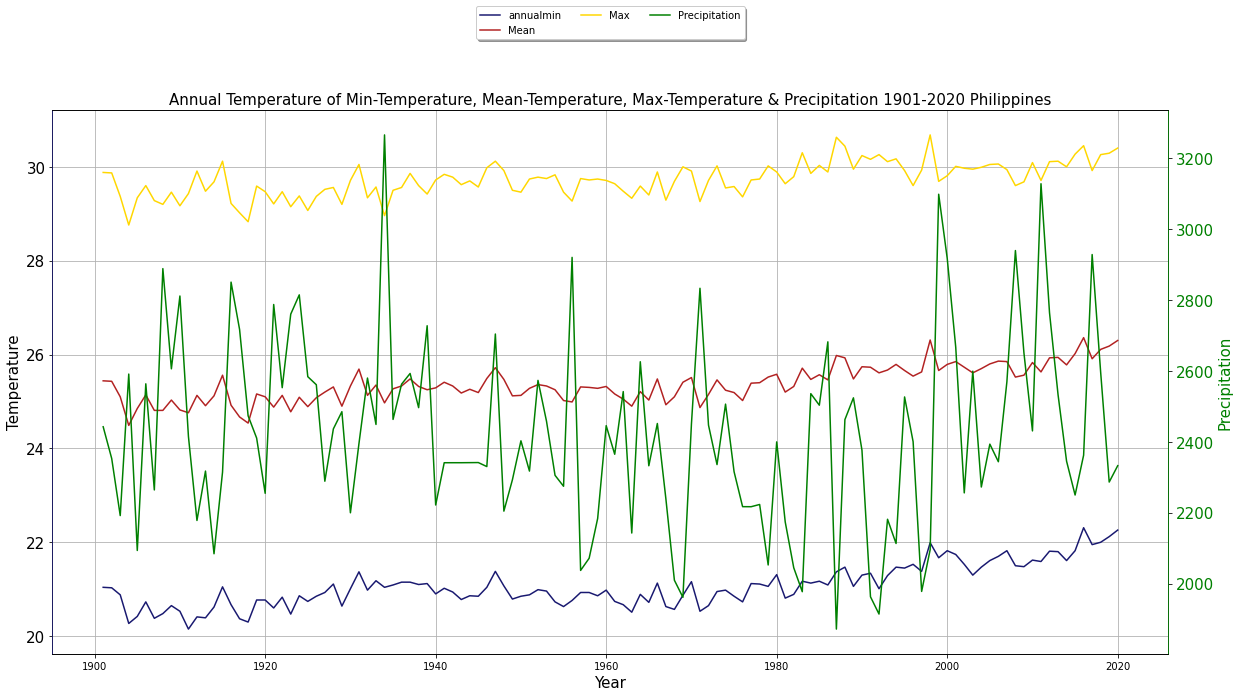

In [74]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 10)
plt.grid(axis='y')
plt.grid(axis='x')

plt.xlabel('Year', fontsize=15)
plt.title('Annual Temperature of Min-Temperature, Mean-Temperature, Max-Temperature & Precipitation 1901-2020 Philippines', fontsize=15)

color1 = 'midnightblue'
color3 = 'firebrick'
color4 = 'gold'
color5 = 'purple'
color6= 'black'

line1 = ax1.plot(annualmin.Year, annualmin.Philippines, color=color1, label ='annualmin')
line2 = ax1.plot(annualmin.Year, annualmean.Philippines, color=color3, label='Mean')
line3 = ax1.plot(annualmin.Year, annualmax.Philippines, color=color4, label='Max') 
ax1.set_ylabel('Temperature', color=color6, fontsize=15)
ax1,plt.tick_params(axis='y', labelcolor=color6, labelsize=15)


color2 = 'green'
ax2 = ax1.twinx()
line4 = ax2.plot(annualmin.Year, annualprecipitation.Philippines, color =color2, label='Precipitation', linestyle='-', marker='')
ax2.set_ylabel('Precipitation',  color=color2, fontsize=15)
ax1,plt.tick_params(axis='y', labelcolor=color2, labelsize=15)


lines = line1 + line2 + line3 + line4
label = [l.get_label() for l in lines]
ax1.legend(lines, label, loc='upper center', bbox_to_anchor=(0.5, 1.20),
          ncol=3, fancybox=True, shadow=True)
ax2.spines ['left'].set_color(color1)
ax2.spines ['right'].set_color(color2)


plt.show()

# Renaming and Cleaning the Key National Hazard Statistics

In [75]:
stats.fillna(0 , inplace=True)

stats

stats.rename(columns={'Volcanic activity': 'Volcanic_Activity', 'Mass movement (dry)': 'Mass_Movement_dry'}, inplace=True)
stats

,Category,Flood,Landslide,Storm,Drought,Earthquake,Volcanic_Activity,Mass_Movement_dry,Epidemic,Wildfire
0,1981,307622.0,0.0,1101545,0.0,0.0,0.0,0.0,0.0,0.0
1,1982,201085.0,0.0,1019615,0.0,0.0,0.0,0.0,0.0,0.0
2,1983,1835.0,0.0,170530,1691060.0,1901.0,0.0,0.0,0.0,0.0
3,1984,0.0,0.0,4535206,0.0,0.0,70000.0,0.0,0.0,0.0
4,1985,5444.0,0.0,1603974,0.0,175.0,0.0,0.0,0.0,0.0
5,1986,615.0,0.0,1242736,0.0,0.0,0.0,0.0,0.0,0.0
6,1987,0.0,0.0,3237632,1002100.0,0.0,0.0,0.0,0.0,0.0
7,1988,0.0,0.0,4517505,0.0,0.0,0.0,0.0,0.0,0.0
8,1989,307511.0,1277.0,2136865,0.0,0.0,0.0,0.0,0.0,0.0
9,1990,712736.0,0.0,6319583,254282.0,1632072.0,0.0,0.0,200.0,0.0


# Plotting the Key Natural Hazard Statistics for 1980-2020

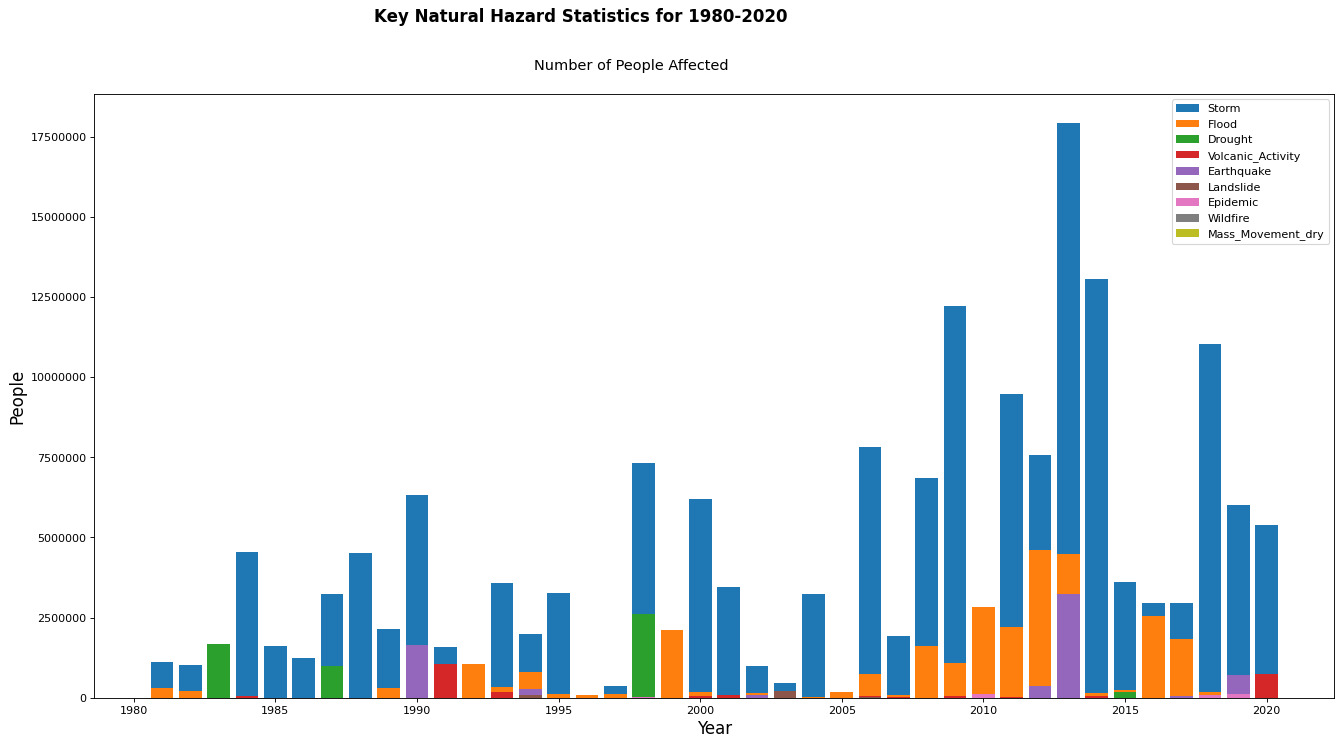

In [76]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(20, 10), dpi=80)
ax.bar(stats.loc[0:39, 'Category'], stats.loc[0:39, 'Storm'], label='Storm')
ax.bar(stats.loc[0:39, 'Category'], stats.loc[0:39, 'Flood'], label='Flood')
ax.bar(stats.loc[0:39, 'Category'], stats.loc[0:39, 'Drought'], label='Drought')
ax.bar(stats.loc[0:39, 'Category'], stats.loc[0:39, 'Volcanic_Activity'], label='Volcanic_Activity')
ax.bar(stats.loc[0:39, 'Category'], stats.loc[0:39, 'Earthquake'], label='Earthquake')
ax.bar(stats.loc[0:39, 'Category'], stats.loc[0:39, 'Landslide'], label='Landslide')
ax.bar(stats.loc[0:39, 'Category'], stats.loc[0:39, 'Epidemic'], label='Epidemic')
ax.bar(stats.loc[0:39, 'Category'], stats.loc[0:39, 'Wildfire'], label='Wildfire')
ax.bar(stats.loc[0:39, 'Category'], stats.loc[0:39, 'Mass_Movement_dry'], label='Mass_Movement_dry')
ax.legend()
tick_spacing = 5
ax.ticklabel_format(useOffset=False, style='plain')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.ylabel('People', fontsize=15)
plt.xlabel('Year', fontsize=15)

subtitle = [
    "Number of People Affected", 
]

fig.text(
    0.30,
    0.97,
    "Key Natural Hazard Statistics for 1980-2020",
    color='black',
    fontsize=15,
    fontname="sans-serif",
    weight="bold"
)

fig.text(
    0.40,
    0.91,
    "\n".join(subtitle),
    ha="left",
    color='black',
    fontname="sans-serif",
    fontsize=13,
)
plt.show()

# Renaming the Observed Avarage Annual Mean Temperature


In [77]:
ob_avg.rename(columns={'Annual Mean': 'Annual_Mean', '5-yr smooth': '5year_smooth'}, inplace=True)
ob_avg

,Category,Annual_Mean,5year_smooth
0,1901,25.44,25.43
1,1902,25.43,25.26
2,1903,25.10,25.10
3,1904,24.49,24.96
4,1905,24.85,24.86
...,...,...,...
115,2016,26.36,26.06
116,2017,25.91,26.11
117,2018,26.11,26.16
118,2019,26.18,26.20


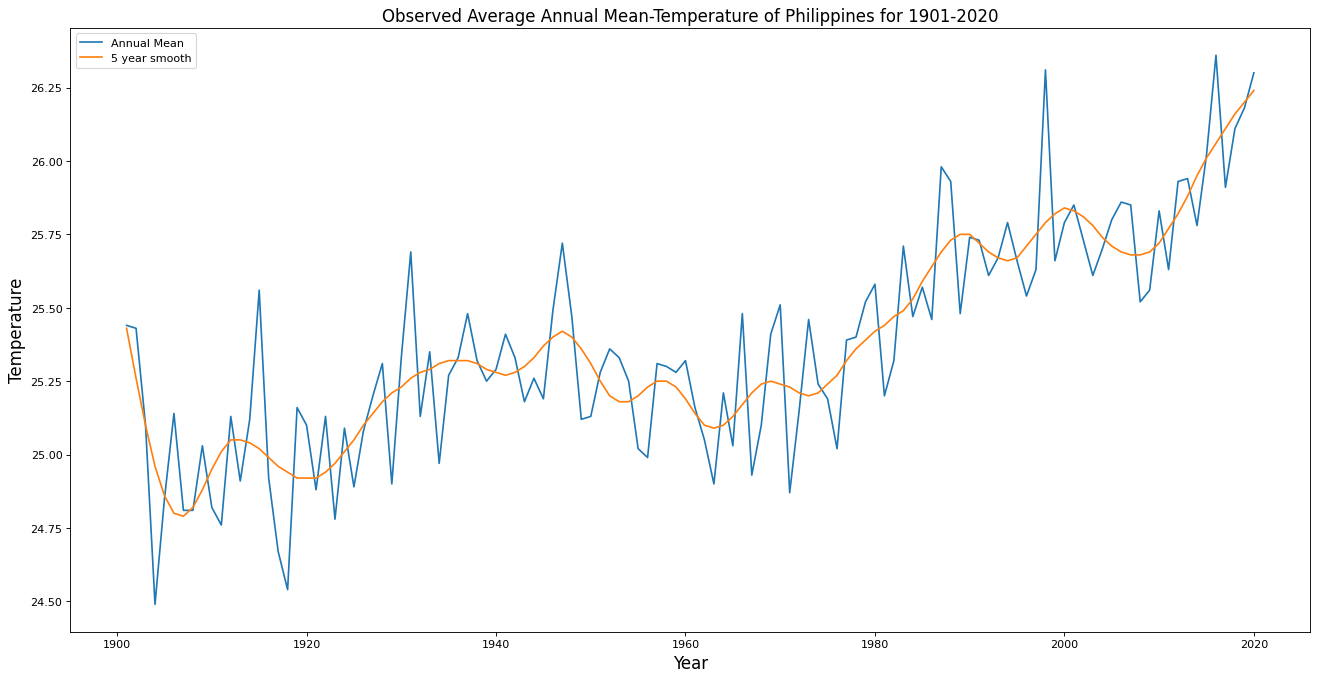

In [79]:
fig = plt.subplots(figsize=(20, 10), dpi=80)
plt.title('Observed Average Annual Mean-Temperature of Philippines for 1901-2020', fontsize=15)
plt.plot(ob_avg.loc[0:119, 'Category'], ob_avg.loc[0:119, 'Annual_Mean'], marker='', label='Annual Mean')
plt.plot(ob_avg.loc[0:119, 'Category'], ob_avg.loc[0:119, '5year_smooth'], marker='', label='5 year smooth')
plt.legend()
plt.ylabel('Temperature', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.show()